In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

# Ẩn cảnh báo PerformanceWarning
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("dataset/data.csv")

Tạo df chỉ chứa những người bị rủi ro đau tim


In [19]:
df_heart_attack = df[df["Heart Attack Risk"] == 1].reset_index(drop=True)

## Heatmap: số người bị rủi ro đau tim theo từng Stress Level và từng nhóm tuổi


chia ra các nhóm tuổi
liệt kê các giá trị tuổi có trong df_heart_attack


In [20]:
ages = sorted(df_heart_attack["Age"].unique().tolist())

Tuổi phân bố từ 18 đến 90
Chia thành 8 nhóm tuổi: 18 - 20, 21 - 30, 31 - 40, ...., 81 - 90


In [21]:
age_groups = ["18 - 20"]

for i in range(21, 81 + 1, 10):
    age_groups.append(str(i) + " - " + str(i + 9))

tạo df để vẽ heatmap gồm 2 cột Age, Stress Level


In [22]:
df_heatmap = df_heart_attack[["Age", "Stress Level"]]

Thêm cột Age Group vào df_heatmap


In [23]:
def add_Age_Group_to_df_heatmap(df_heatmap, age_groups):
    age_groups_col = []

    for row in range(len(df_heatmap)):
        index_in_age_groups = int((df_heatmap.loc[row, "Age"] - 1) / 10) - 1

        age_groups_col.append(age_groups[index_in_age_groups])

    df_heatmap["Age Group"] = age_groups_col

In [24]:
add_Age_Group_to_df_heatmap(df_heatmap, age_groups)

tạo ra mảng thống kê số người theo từng Age Group và Stress Level
dòng là Stress Level
cột là Age Group


In [25]:
def get_stat_arr(df_heatmap, age_groups):
    df_heatmap.set_index(["Age Group", "Stress Level"], inplace=True)

    # Tạo stress_levels từ 10 về 1
    stress_levels = [i for i in range(10, 1 - 1, -1)]

    df_result = pd.DataFrame(index=stress_levels, columns=age_groups)

    for age_group in age_groups:
        for stress_level in stress_levels:
            data = None

            try:
                data = df_heatmap.loc[(age_group, stress_level), ["Age"]]
            except KeyError:
                df_result.loc[(stress_level), age_group] = 0
                continue

            df_result.loc[(stress_level), age_group] = len(data)

    df_result = df_result.astype("int64")

    df_heatmap.reset_index(inplace=True)

    return df_result

In [26]:
stat_arr = get_stat_arr(df_heatmap, age_groups)

- Vẽ heatmap dựa trên stat_arr


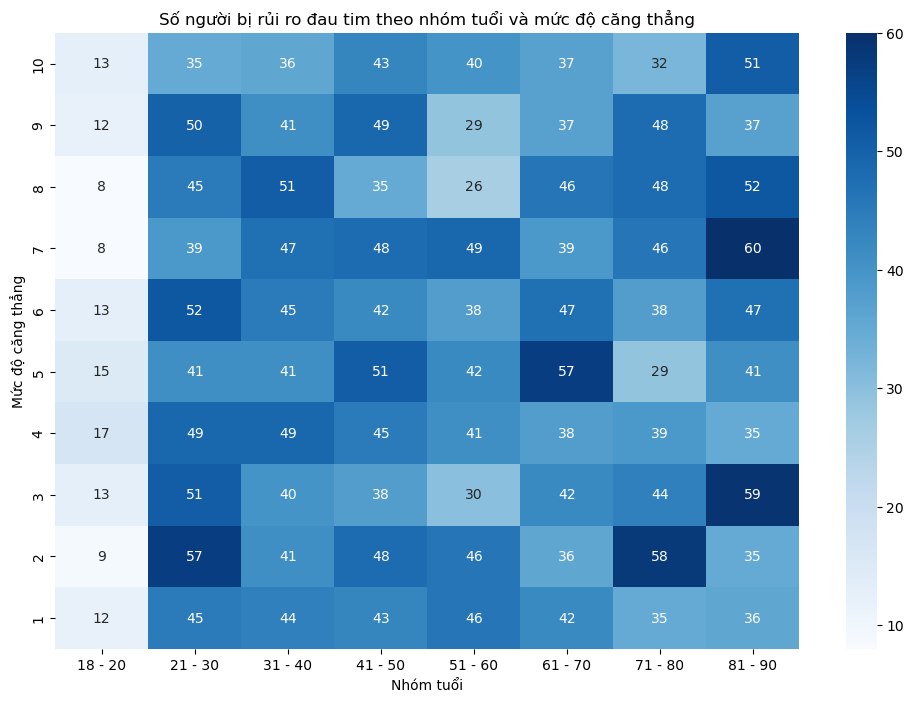

In [27]:
# Kích thước
plt.figure(figsize=(12, 8))

# Vẽ heatmap với dải màu xanh (Blues)
sns.heatmap(stat_arr, annot=True, cmap="Blues")


# Đặt tên cho trục X và Y
plt.xlabel("Nhóm tuổi")
plt.ylabel("Mức độ căng thẳng")

# Đặt tên cho biểu đồ
plt.title("Số người bị rủi ro đau tim theo nhóm tuổi và mức độ căng thẳng")


# Hiển thị biểu đồ
plt.show()

**1) Nội dung câu hỏi**

- Số người bị rủi ro đau tim phân bố ở từng nhóm tuổi và từng mức độ căng thẳng như thế nào

**2) Các biến sử dụng**

- `Stress Level`, `Heart Attack Risk`, `Age` <br>

**3) Loại biểu đồ**

- Heatmap

**4) Ý nghĩa của biểu đồ**

- Giá trị của 1 ô ứng với các dòng là mức độ căng thẳng, các cột là nhóm tuổi, giá trị càng lớn, màu xanh càng đậm

**5) Vì sao sử dụng biểu đồ**

- Biểu đồ sử dụng dải màu xanh, giá trị lớn hơn tương ứng với màu xanh đậm hơn giúp người dùng hình dung được các giá trị thay đổi như thế nào

**6) Kết luận**

- Đối với nhóm tuổi 18 - 20, số người bị rủi ro đau tim theo từng mức độ căng thẳng là ít, chứng tỏ nguyên nhân gây ra đau tim ở lứa tuổi không phải do sự căng thẳng. Điều này hợp lí vì ở độ tuổi này, sự căng thẳng là không nhiều
- Đối với các nhóm tuổi 21 - 30, 31 - 40, 41 - 50, số người bị rủi ro đau tim theo từng mức độ căng thẳng là tương đối cao (dao động quanh 40), thể hiện nguyên nhân bị rủi ro đau tim một phần là do sự căng thẳng. Điều này hợp lí vì ở nhóm tuổi này, có rất nhiều thứ phải lo toan nên sự căng thẳng là nhiều
- Đối với nhóm tuổi 81 - 90, số người bị rủi ro đau tim ở các mức độ căng thẳng cao (mức 7, 8, 10) dao động quanh 55, thể hiện ở lứa tuổi này càng căng thẳng, nguy cơ bị đau tim càng tăng. Điều này hợp lí vì trái tim của người già suy yếu nên chỉ cần có tác động về mặt tinh thần, nguy cơ đau tim là rất cao


## Histogram: Tần suất bị tiểu đường ở từng nhóm tuổi.


Tạo ra mảng gồm cột Age của những người bị Diabete


In [28]:
age_diabetes = df[df["Diabetes"] == 1]["Age"].tolist()

vẽ biểu đồ


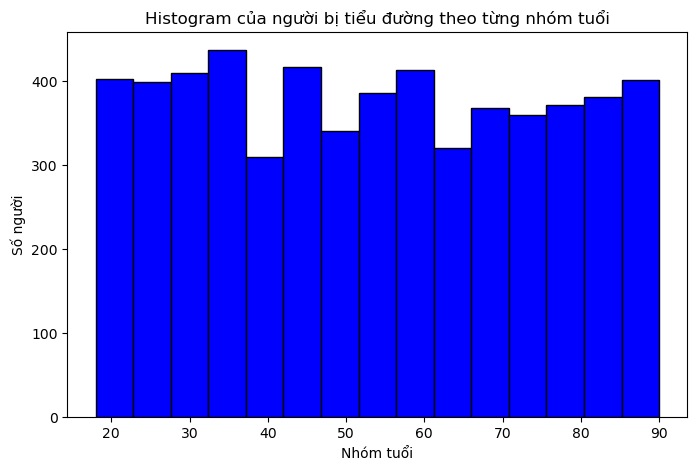

In [29]:
# Creating the histogram
plt.figure(figsize=(8, 5))

# Draw
plt.hist(age_diabetes, bins=15, color="blue", edgecolor="black")

plt.title("Histogram của người bị tiểu đường theo từng nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Số người")

# Display the chart
plt.show()

**1) Nội dung câu hỏi**

- Số người bị tiểu đường phân bố ở các nhóm tuổi như thế nào

**2) Các biến sử dụng**

- `Diabetes`, `Age`

**3) Loại biểu đồ**

- Histogram

**4) Ý nghĩa của biểu đồ**

- Biểu đồ thể hiện số lượng người bị mắc tiểu đường ở các nhóm tuổi 18 - 20, 21 - 30, 31 - 40, ..., 81 - 90

**5) Vì sao sử dụng biểu đồ**

- Biểu đồ Histogram thể hiện sự phân bố tần suất giá trị trong dữ liệu qua từng nhóm

**6) Kết luận**

- số người bị tiểu đường ở các nhóm tuổi đều cao và đồng đều nhau, chứng tỏ những người trẻ có khả năng bị tiểu đường ngang những người trung niên và người già


## Boxplot: vẽ boxplot của Exercise Hours Per Week của từng châu lục của người bị rủi ro đau tim


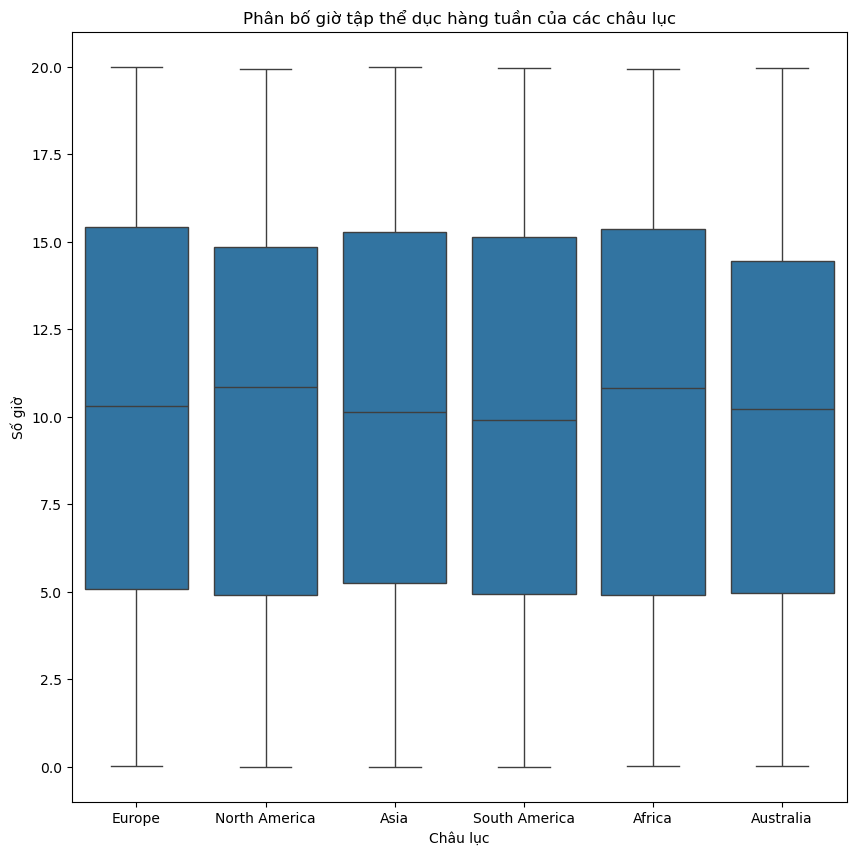

In [30]:
# Kích thước biểu đồ
plt.figure(figsize=(10, 10))

# Vẽ boxplot
sns.boxplot(x="Continent", y="Exercise Hours Per Week", data=df_heart_attack)

# Đặt tên cho biểu đồ
plt.title("Phân bố giờ tập thể dục hàng tuần của các châu lục")

# Đặt tên 2 trục
plt.xlabel("Châu lục")
plt.ylabel("Số giờ")

# Hiển thị biểu đồ
plt.show()

**1) Nội dung câu hỏi**

- Giờ tập thể dục hàng tuần của những người bị rủi ro đau tim ở các châu lục phân bố như thế nào ?

**2) Các biến sử dụng**

- `Exercise Hours Per Week`, `Continent`, `Heart Attack Risk`

**3) Loại biểu đồ**

- Boxplot

**4) Ý nghĩa của biểu đồ**

- Biểu đồ thể hiện phạm vi các giá trị (giờ tập thể dục hàng tuần) ở các châu lục của người có rủi ro đau tim

**5) Vì sao sử dụng biểu đồ**

- Biểu đồ boxplot thể hiện được sự phân bố các giá trị trong dữ liệu

**6) Kết luận**

- Số giờ tập thể dục hàng tuần của những người bị rủi ro đau tim ở các châu lục phân bố trong khoảng từ 5 đến 15, trung vị là 10, tức là chưa đến 2 tiếng 1 ngày
